In [2]:
from celluloid import Camera # getting the camera
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from PIL import Image
import os
import pandas as pd
from matplotlib.offsetbox import ( OffsetImage,
                                  AnnotationBbox)
from IPython.display import HTML # to show the animation in Jupyter
import warnings
warnings.simplefilter(action='ignore')

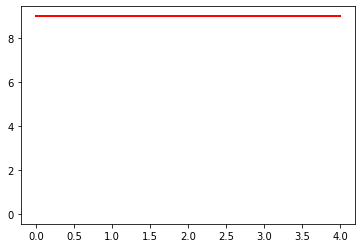

In [2]:
fig, ax = plt.subplots() # creating my fig
camera = Camera(fig)# the camera gets the fig we'll plot
for i in range(10):
    ax.plot([i]* 5, c='red',linewidth=2) # 5 element array from 0 to 9
    camera.snap() # the camera takes a snapshot of the plot
animation = camera.animate() # animation ready
HTML(animation.to_html5_video()) # displaying the animation

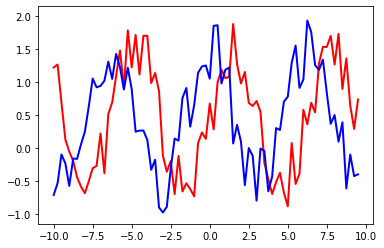

In [99]:
fig, ax = plt.subplots() # creating my fig
camera = Camera(fig)# the camera gets the fig we'll plot
x  =  np.arange(-10,10,0.25)
y = np.sin(x)
z  =  np.cos(x)
for i in range(len(x)):
    ax.plot(x[:i],y[:i]+ 1.002*np.random.random(size=i),color="red",linewidth=2) # 5 element array from 0 to 9
    ax.plot(x[:i],  z[:i]+1.002*np.random.random(size=i),color="blue",linewidth=2) # 5 element array from 0 to 9
    camera.snap() # the camera takes a snapshot of the plot
animation = camera.animate() # animation ready
HTML(animation.to_html5_video()) # displaying the animation

In [100]:
animation.save('animation_motion.mp4',
               dpi=300,
               savefig_kwargs={
                   'frameon': False,
                   'pad_inches': 'tight'
               }
              )

In [101]:
!ffmpeg -i animation_motion.mp4 -filter:v fps=fps=30 animation_motion.gif

ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 4.0.1 (tags/RELEASE_401/final)
  configuration: --prefix=/opt/anaconda3 --cc=x86_64-apple-darwin13.4.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100
  libavdevice    58.  8.100 / 58.  8.100
  libavfilter     7. 57.100 /  7. 57.100
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  5.100 /  5.  5.100
  libswresample   3.  5.100 /  3.  5.100
  libpostproc    55.  5.100 / 55.  5.100
Input #0, mov,mp4,m4a,3gp,3g2,mj2, from 'animat

# Evolution Plot

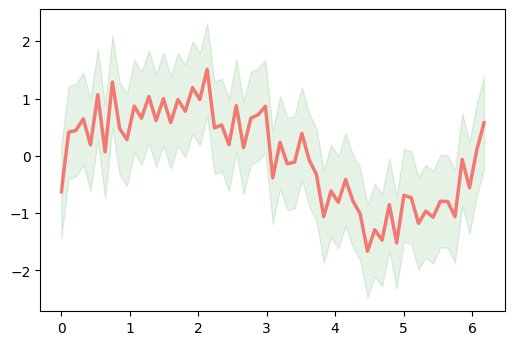

In [108]:
fig, ax = plt.subplots(dpi=100) # let's make it bigger
camera = Camera(fig)# the camera gets our figure
x = np.linspace(0, np.pi*2, 60) # a sine circle
y = np.sin(x) + np.random.normal(0.01,0.32,len(x)) # sine
y1 =  y -  np.std(y)
y2 =  y + np.std(y)
for i in range(len(x)):
    x_t = x[:i] # current dataset
    y_t = y[:i] # current sine
    ax.plot(x_t, y_t, 'r',alpha=0.5,linewidth=2.5,)
#     axes.plot(x,y, color='blue', alpha=0.5,linewidth=2.5,label="Sin(x)+Noise")
    ax.fill_between(x[:i], y1[:i], y2[:i],color="green",alpha=0.1)
    camera.snap()
animation = camera.animate(blit=False, interval=40)
HTML(animation.to_html5_video())

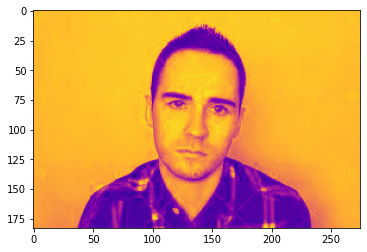

In [112]:
import os
path = './basedata/test'
basepath  =  os.getcwd()
basepath =  os.path.join(basepath,path)
fig, ax = plt.subplots() # make it bigger
camera = Camera(fig)# the camera gets our figure
for img in os.listdir(path):
    if(img.endswith('.jpg')):
        file =  os.path.join(basepath,img)
        img_obj = plt.imread(file)
        ax.imshow(img_obj[:,:,0],cmap=plt.cm.plasma)
        camera.snap()
animation = camera.animate(blit=False, interval=240)
HTML(animation.to_html5_video())

In [97]:
animation.save('animation_moods.mp4',
               dpi=300,
               savefig_kwargs={
                   'frameon': False,
                   'pad_inches': 'tight'
               }
              )

In [98]:
!ffmpeg -i animation_moods.mp4 -filter:v fps=fps=30 animation_moods.gif

ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 4.0.1 (tags/RELEASE_401/final)
  configuration: --prefix=/opt/anaconda3 --cc=x86_64-apple-darwin13.4.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100
  libavdevice    58.  8.100 / 58.  8.100
  libavfilter     7. 57.100 /  7. 57.100
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  5.100 /  5.  5.100
  libswresample   3.  5.100 /  3.  5.100
  libpostproc    55.  5.100 / 55.  5.100
Input #0, mov,mp4,m4a,3gp,3g2,mj2, from 'animat

## Using dynamic labels and titles

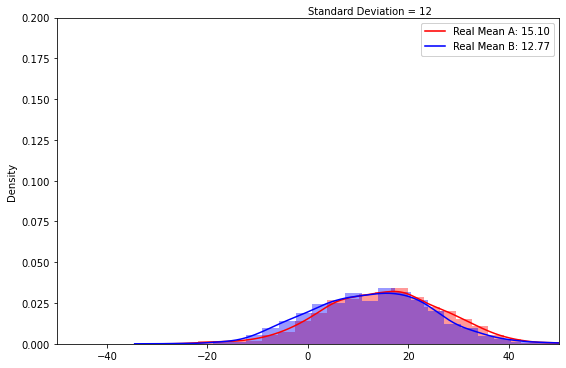

In [89]:
std = 3 # start std 
Am = 15. # mean of first normal
Bm = 12.5 # mean of second normal
fig, ax = plt.subplots(figsize=(9,6)) # empty fig
camera = Camera(fig)
for j in range(10):
    plt.ylim((0, 0.2)) # setting up the limits (or else it will auto ajust
    plt.xlim((-50, 50))
    
    A = np.random.normal(Am, std, size=(1000)) # creating the 1000-sized normals
    B = np.random.normal(Bm, std, size=(1000))    
    A_plot = sns.distplot(A, color='red') 
    B_plot = sns.distplot(B, color='blue')
    plt.legend(( 
        'Real Mean A: {:.2f}'.format(np.mean(A)),
        'Real Mean B: {:.2f}'.format(np.mean(B))
    ))
        
    ax.text(0.5, 1.01, "Standard Deviation = "+str(std), transform=ax.transAxes) # making the dynamic title
    camera.snap() # camera snapshot
    
    std += 1 # incrementing the std
anim = camera.animate() # animating the plots
HTML(anim.to_html5_video())

In [90]:
anim.save('animation_dens.mp4',
               dpi=300,
               savefig_kwargs={
                   'frameon': False,
                   'pad_inches': 'tight'
               }
              )

In [91]:
!ffmpeg -i animation_dens.mp4 -filter:v fps=fps=30 animation_dens.gif

ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 4.0.1 (tags/RELEASE_401/final)
  configuration: --prefix=/opt/anaconda3 --cc=x86_64-apple-darwin13.4.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100
  libavdevice    58.  8.100 / 58.  8.100
  libavfilter     7. 57.100 /  7. 57.100
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  5.100 /  5.  5.100
  libswresample   3.  5.100 /  3.  5.100
  libpostproc    55.  5.100 / 55.  5.100
Input #0, mov,mp4,m4a,3gp,3g2,mj2, from 'animat

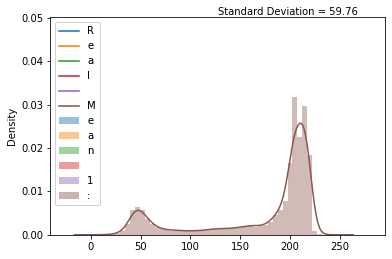

In [93]:
fig, ax = plt.subplots() # make it bigger
camera = Camera(fig)# the camera gets our figure
for img in os.listdir(path):
    if(img.endswith('.jpg')):
        file =  os.path.join(basepath,img)
        img_obj = plt.imread(os.path.join(file))
        std =  img_obj.reshape(-1,1).std()
        mean = img_obj.reshape(-1,1).mean()
        A_plot = sns.distplot(img_obj.reshape(-1,1)) 
        clas =  file.split('/')[-1].split('.')[0]
        plt.legend(f'Real Mean {clas}: {mean:.2f}')
        
        ax.text(0.5, 1.01, "Standard Deviation = "+str(np.round(std,2)), transform=ax.transAxes) # making the dynamic title
        camera.snap() # camera snapshot
    
animation = camera.animate(blit=False, interval=620)
HTML(animation.to_html5_video())

In [94]:
animation.save('animation_pics.mp4',
               dpi=300,
               savefig_kwargs={
                   'frameon': False,
                   'pad_inches': 'tight'
               }
              )

In [95]:
!ffmpeg -i animation_pics.mp4 -filter:v fps=fps=30 animation_pics.gif

ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 4.0.1 (tags/RELEASE_401/final)
  configuration: --prefix=/opt/anaconda3 --cc=x86_64-apple-darwin13.4.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100
  libavdevice    58.  8.100 / 58.  8.100
  libavfilter     7. 57.100 /  7. 57.100
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  5.100 /  5.  5.100
  libswresample   3.  5.100 /  3.  5.100
  libpostproc    55.  5.100 / 55.  5.100
Input #0, mov,mp4,m4a,3gp,3g2,mj2, from 'animat

In [126]:
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
def getImage(path, new_size = 20):
    # return OffsetImage(plt.imread(path))
    img = Image.open(path)
    img.thumbnail((new_size, new_size), Image.BILINEAR)  # resizes image in-place

    return OffsetImage(img)

/Users/yusuf/Desktop/AIMS/Research/Lab/Experiments/./basedata/test/4.jpg


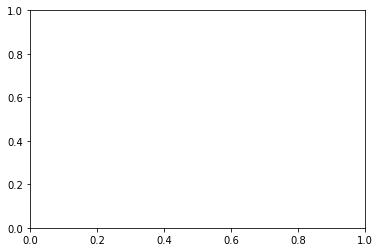

In [131]:
fig, ax = plt.subplots()
for img in os.listdir(path):
    if(img.endswith('.jpg')):
        file =  os.path.join(basepath,img)
        print(file)
        print(getImage(file))
        break

In [41]:
import os
path = './basedata/test'
basepath  =  os.getcwd()
basepath =  os.path.join(basepath,path)

<Figure size 1200x720 with 0 Axes>

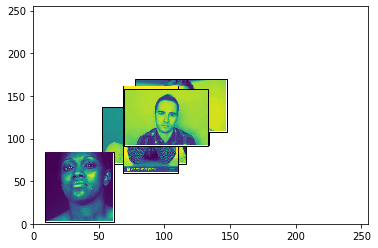

In [61]:
annotate(basepath)

<Figure size 1200x720 with 0 Axes>

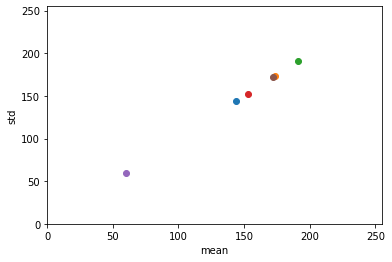

In [62]:
res  = scatter(basepath)

In [48]:
res

,mean,std,class
0,143.656089,143.656089,4
1,173.419281,173.419281,5
2,191.273531,191.273531,6
3,152.589725,152.589725,2
4,59.961558,59.961558,3
5,172.170777,172.170777,1


In [198]:
basepath = os.path.join(os.getcwd(),'basedata/Normal')
basepath

'/Users/yusuf/Desktop/AIMS/Research/Lab/Experiments/basedata/Normal'

COVID


<Figure size 1200x720 with 0 Axes>

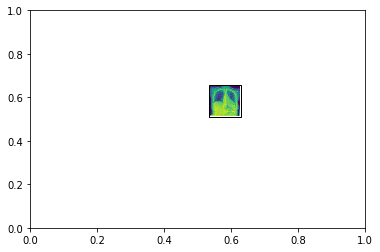

In [205]:

plt.figure(figsize=(10,6),dpi=120)
fig, ax = plt.subplots()
# camera = Camera(fig)# the camera gets our figure
ls = {'path':[],'imageid':[],'class':[]}
for f in os.listdir(basepath):
    if(f.endswith('.png')):
        file =  os.path.join(basepath,f)
        arr_img = plt.imread(file)
        mean = arr_img[::].mean()
        std = arr_img[::].mean()
        xy = [mean,std]
        imagebox = OffsetImage(arr_img, zoom=0.1)
        imagebox.image.axes = ax
        ab = AnnotationBbox(imagebox, xy,xycoords='data',boxcoords="offset points",pad=0.1)
        ax.add_artist(ab)
        clas =  f.split('/')[-1].split('.')
        classes =  clas[0].split('-')[0]
        imid =  clas[0].split('-')[1]
        print(classes)
        break
#         camera.snap() # camera snapshot

# plt.xlim(0,1)
# plt.ylim(0,1)
plt.show()
# anim = camera.animate() # animating the plots
# HTML(anim.to_html5_video())

<Figure size 1200x720 with 0 Axes>

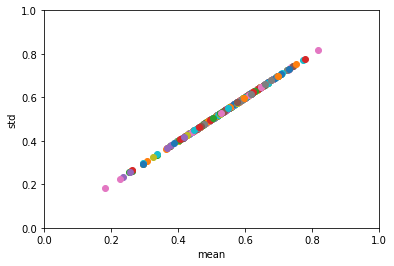

In [6]:
plt.figure(figsize=(10,6),dpi=120)
fig, ax = plt.subplots()
camera = Camera(fig)# the camera gets our figure
df =  {"mean": [], "std": [],'class': []}
for f in os.listdir(basepath):
    if(f.endswith('.png')):
        file =  os.path.join(basepath,f)
        arr_img = plt.imread(file)
        mean = arr_img[::].mean()
        clas =  file.split('/')[-1].split('.')[0]
        std = arr_img[::].mean()
        df['mean'].append(mean)
        df['std'].append(std)
        df['class'].append(clas)
        ax.scatter(mean,std)
        camera.snap() # camera snapshot
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('mean')
plt.ylabel('std')
plt.show()
anim = camera.animate() # animating the plots
HTML(anim.to_html5_video())

In [7]:
pd.DataFrame(df)

,mean,std,class
0,0.581232,0.581232,COVID-1175
1,0.546297,0.546297,COVID-3010
2,0.465856,0.465856,Lung_Opacity-101
3,0.442279,0.442279,Normal-10065
4,0.571235,0.571235,COVID-2118
...,...,...,...
403,0.407120,0.407120,COVID-2667
404,0.417620,0.417620,COVID-1408
405,0.576911,0.576911,COVID-762
406,0.529080,0.529080,COVID-992


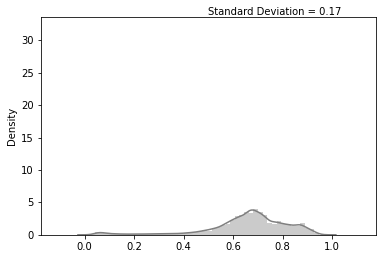

In [8]:
fig, ax = plt.subplots() # make it bigger
camera = Camera(fig)# the camera gets our figure
for f in os.listdir(basepath):
    if(f.endswith('.png')):
        file =  os.path.join(basepath,f)
        img_obj = plt.imread(os.path.join(file))
        std =  img_obj.reshape(-1,1).std()
        mean = img_obj.reshape(-1,1).mean()
        A_plot = sns.distplot(img_obj.reshape(-1,1)) 
        clas =  file.split('/')[-1].split('.')[0]
#         plt.legend(f'Real Mean {clas}: {mean:.2f}')
        
        ax.text(0.5, 1.01, "Standard Deviation = "+str(np.round(std,2)), transform=ax.transAxes) # making the dynamic title
        camera.snap() # camera snapshot
    
animation = camera.animate(blit=False, interval=620)
HTML(animation.to_html5_video())

In [184]:
x  =  np.random.normal(0.5,6,100)
x = x.reshape(100,1)

In [185]:
f =  lambda x: 2*x + 20 + np.random.normal(0.5,2.64,(100,1))

In [186]:
y  =  f(x)

In [187]:
y.shape

(100, 1)

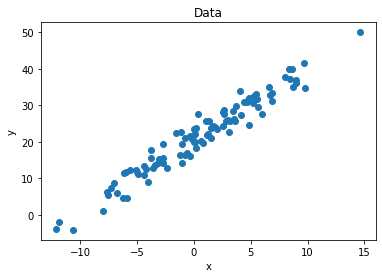

In [188]:
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Data")
plt.show()

In [189]:
# We are adding a bias term 
x_b = np.c_[np.ones((100, 1)), x]
w = np.linalg.inv(x_b.T@x_b)@x_b.T@y

In [190]:
yhat =  x_b@w

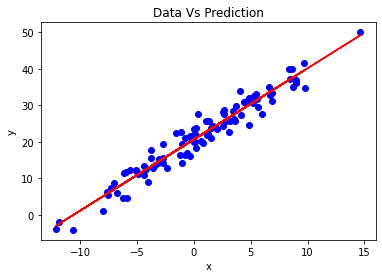

In [193]:
fig, ax = plt.subplots() # make it bigger
camera = Camera(fig)# the camera gets our figure
for i in range(1,len(x)):
    ax.scatter(x[:i],y[:i],color='blue',label="y")
    ax.plot(x[:i],yhat[:i],label=r"$\hat{y}$",color="red")
    ax.set_title("Data Vs Prediction")
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    camera.snap() # camera snapshot
    
animation = camera.animate()
HTML(animation.to_html5_video())

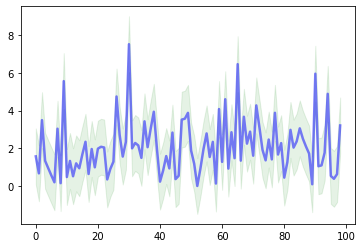

In [165]:
fig, ax = plt.subplots() # make it bigger
camera = Camera(fig)# the camera gets our figure
x  =  np.arange(0,100,1)
err =  np.abs(y -  yhat)
e1 =  err -  np.std(err)
e2 =  err + np.std(err)
for i in range(1,len(x)):
    ax.plot(x[:i], err[:i], color='blue', alpha=0.5,linewidth=2.5,label="Prediction Error")
    ax.fill_between(x[:i], e1.reshape(-1,)[:i], e2.reshape(-1,)[:i],color="green",alpha=0.1)
    camera.snap() # camera snapshot
    
animation = camera.animate()
HTML(animation.to_html5_video())

In [197]:
!pip3 install visualkeras

     |████████████████████████████████| 255 kB 46 kB/s eta 0:00:01
  Created wheel for aggdraw: filename=aggdraw-1.3.12-cp39-cp39-macosx_11_0_x86_64.whl size=78738 sha256=9972d3f6dfd9186e702fa8a60d813b54de29e03c1553eb73b0d674c92494ae01
  Stored in directory: /Users/yusuf/Library/Caches/pip/wheels/b4/a7/d6/5429430f3390b33f4923009c749ce00bbe309134d5a700a978
Successfully built aggdraw
